In [1]:
# 코랩에 나눔고딕 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 19s (501 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [ ]:
import os
os.kill(os.getpid(), 9) # 런타임 종료

In [1]:
# 일단 import 
import glob
import pandas as pd

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

import seaborn as sns 

import warnings
warnings.filterwarnings(action='ignore')


In [2]:
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data

array([    0,   -42,  -157,  -317,  -361,  -496,  -635,  -688,  -861,
        -984, -1074, -1080, -1238, -1409, -1425, -1474, -1559, -1468,
       -1464, -1467, -1407, -1555, -1458, -1457, -1437, -1597, -1591,
       -1715, -1852, -2024, -2034, -2026, -2222, -2295, -2361, -2536,
       -2621, -2603, -2735, -2860, -2870, -2925, -2870, -2813, -2807,
       -2738, -2931, -3035, -3235, -3216])

Text(0.5, 0, '시간(분)')

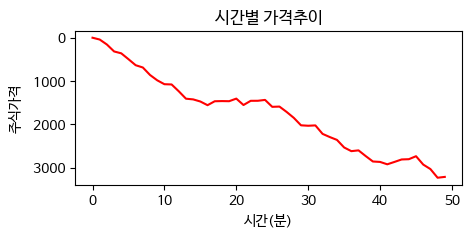

In [4]:
# 한글을 넣어놓고 그러보면 깨진다
plt.figure(figsize=(5,2))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

In [5]:
# 구글 드라이브 마운트하기.
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 데이터 로드

In [6]:
df_sang = pd.read_csv('/content/gdrive/MyDrive/ecothonCBB/data/서울상권_인구_위경도(수정).csv')
display(df_sang.shape, df_sang.head(2))

(6674, 14)

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,시도명,시군구_코드,시군구명,행정동_코드,행정동명,위도,경도
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,112658,서울,11680,강남구,580,삼성1동,37.511003,127.060059
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,112779,서울,11680,강남구,580,삼성1동,37.511003,127.060059


In [7]:
# 2022년 각 분기별 데이터 수 확인
# 각 분기별 데이터가 고르게 분포되어 있다!

df_sang['기준_분기_코드'].value_counts()

4    1669
3    1669
2    1668
1    1668
Name: 기준_분기_코드, dtype: int64

## 데이터 확인

### `시군구명`별 `총 생활인구 수` 합계 확인: df_sang_group

In [8]:
df_sang_group = df_sang.groupby('시군구명')['총_생활인구_수'].sum().to_frame().reset_index()
df_sang_group

,시군구명,총_생활인구_수
0,강남구,337908221
1,강동구,277264660
2,강북구,175677212
3,강서구,237857874
4,관악구,279686042
5,광진구,229156656
6,구로구,160827953
7,금천구,100547986
8,노원구,128241927
9,도봉구,106216586


### `시군구명`별 `총 상가수` 확인: df_sang_cnt

In [15]:
df_sang_cnt = df_sang['시군구명'].value_counts().to_frame().reset_index()

# 컬럼명을 변경하기
df_sang_cnt = df_sang_cnt.rename({'index':'시군구명','시군구명':'총_상가수'},axis='columns')

# 잘 바뀌었나 확인
df_sang_cnt

,시군구명,총_상가수
0,강남구,412
1,영등포구,392
2,중구,312
3,서초구,310
4,종로구,308
5,동대문구,308
6,마포구,308
7,성북구,304
8,관악구,296
9,송파구,280


### 시군구별 총 생활인구 수(df_sang_group)와 시군구별 총 상가 수(df_sang_cnt) merge

In [16]:
# 데이터셋 merge 하기
df_sang_m = pd.merge(df_sang_group, df_sang_cnt, on='시군구명')

# 데이터 확인
df_sang_m

,시군구명,총_생활인구_수,총_상가수
0,강남구,337908221,412
1,강동구,277264660,240
2,강북구,175677212,252
3,강서구,237857874,280
4,관악구,279686042,296
5,광진구,229156656,248
6,구로구,160827953,240
7,금천구,100547986,180
8,노원구,128241927,168
9,도봉구,106216586,172


## 시군구별 비율 컬럼 만들기

In [17]:
# 시군구별 인구수 비율을 구하여 컬럼 추가.
df_sang_m['인구수_비율']=df_sang_m['총_생활인구_수']/df_sang_m['총_생활인구_수'].sum()*100

# 시군구별 상가수 비율을 구하여 컬럼 추가.
df_sang_m['상가수_비율']=df_sang_m['총_상가수']/df_sang_m['총_상가수'].sum()*100

# 데이터 확인.
df_sang_m

,시군구명,총_생활인구_수,총_상가수,인구수_비율,상가수_비율
0,강남구,337908221,412,6.875060,6.173209
1,강동구,277264660,240,5.641210,3.596044
2,강북구,175677212,252,3.574318,3.775847
3,강서구,237857874,280,4.839441,4.195385
4,관악구,279686042,296,5.690475,4.435121
5,광진구,229156656,248,4.662407,3.715912
6,구로구,160827953,240,3.272196,3.596044
7,금천구,100547986,180,2.045743,2.697033
8,노원구,128241927,168,2.609202,2.517231
9,도봉구,106216586,172,2.161076,2.577165


### csv 파일로 저장

In [18]:
df_sang_m.to_csv('/content/gdrive/MyDrive/ecothonCBB/data/서울상권_인구_비율.csv', index=False)

In [19]:
pd.read_csv('/content/gdrive/MyDrive/ecothonCBB/data/서울상권_인구_비율.csv')

,시군구명,총_생활인구_수,총_상가수,인구수_비율,상가수_비율
0,강남구,337908221,412,6.875060,6.173209
1,강동구,277264660,240,5.641210,3.596044
2,강북구,175677212,252,3.574318,3.775847
3,강서구,237857874,280,4.839441,4.195385
4,관악구,279686042,296,5.690475,4.435121
5,광진구,229156656,248,4.662407,3.715912
6,구로구,160827953,240,3.272196,3.596044
7,금천구,100547986,180,2.045743,2.697033
8,노원구,128241927,168,2.609202,2.517231
9,도봉구,106216586,172,2.161076,2.577165


### 인구수 비율: 막대그래프

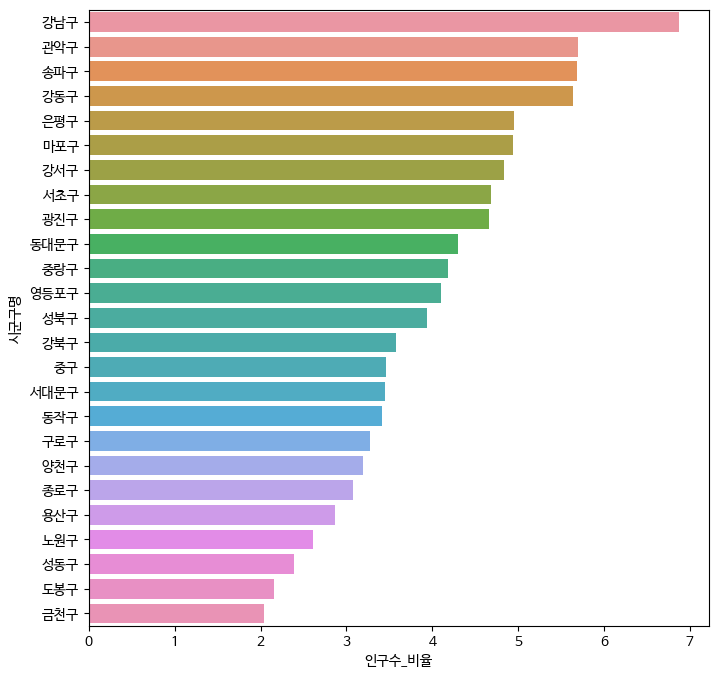

In [20]:
plt.figure(figsize=(8,8))  #size 조절
plt.xticks(rotation = 0)  #x축 조절

sns.barplot(
    data = df_sang_m.sort_values(by='인구수_비율', ascending=False),
    x = "인구수_비율",
    y = "시군구명"
    )
plt.show()

### 인구수 비율 및 상가수 비율 비교: 막대그래프

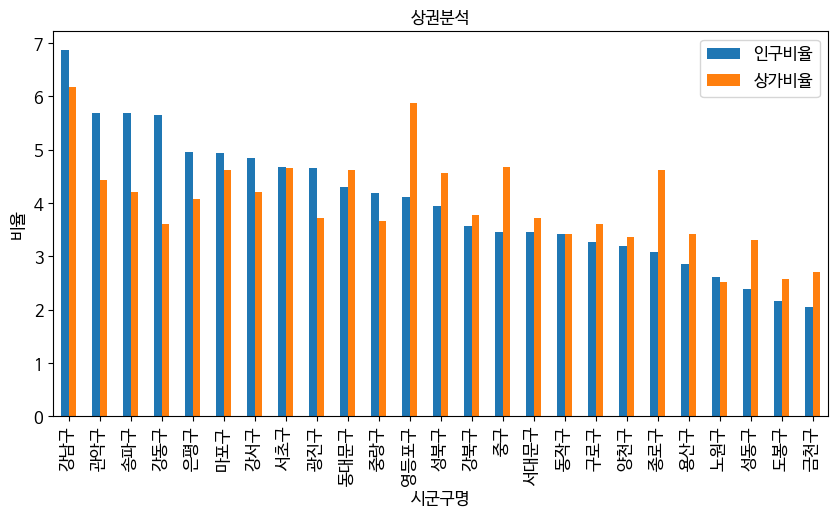

In [21]:
# 새로운 데이터셋에 시군구명, 인구수 비율, 상가수 비율 데이터만 넣기.
df_sang_m_ratio = df_sang_m[["시군구명","인구수_비율","상가수_비율"]]

# 시도명을 새로운 인덱스로 지정.
df_sang_m_ratio = df_sang_m_ratio.set_index("시군구명")

# 그래프 그리기.
ax = df_sang_m_ratio.sort_values(by='인구수_비율', ascending=False).plot(
    kind='bar', title='상권분석', figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel('시군구명', fontsize=12)          
ax.set_ylabel('비율', fontsize=12)     
ax.legend(['인구비율', '상가비율'], fontsize=12) 